In [50]:
import numpy as np
import pandas as pd
import statsmodels as sts
from math import sqrt
from matplotlib import pyplot as plt
%matplolib inline

UsageError: Line magic function `%matplolib` not found.


In [51]:
def t_criteria(dataframe, value):
    dataframe_mean = dataframe[value].mean()
    dataframe_std = dataframe[value].std(ddof=1) / sqrt(len(dataframe[value]))
    answer = list(_tconfint_generic(dataframe_mean, dataframe_std, len(dataframe[value]) - 1,
                                     0.05, 'two-sided'))
    answer = list(map(lambda x: round(x,4), answer))
    return answer

In [52]:
data_frame = pd.read_csv("water_UK.txt", delimiter='\t')

In [53]:
data_frame.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


In [54]:
data_frame.shape

(61, 4)

In [55]:
data_frame.describe()

,mortality,hardness
count,61.000000,61.000000
mean,1524.147541,47.180328
std,187.668754,38.093966
min,1096.000000,5.000000
25%,1379.000000,14.000000
50%,1555.000000,39.000000
75%,1668.000000,75.000000
max,1987.000000,138.000000


No handles with labels found to put in legend.


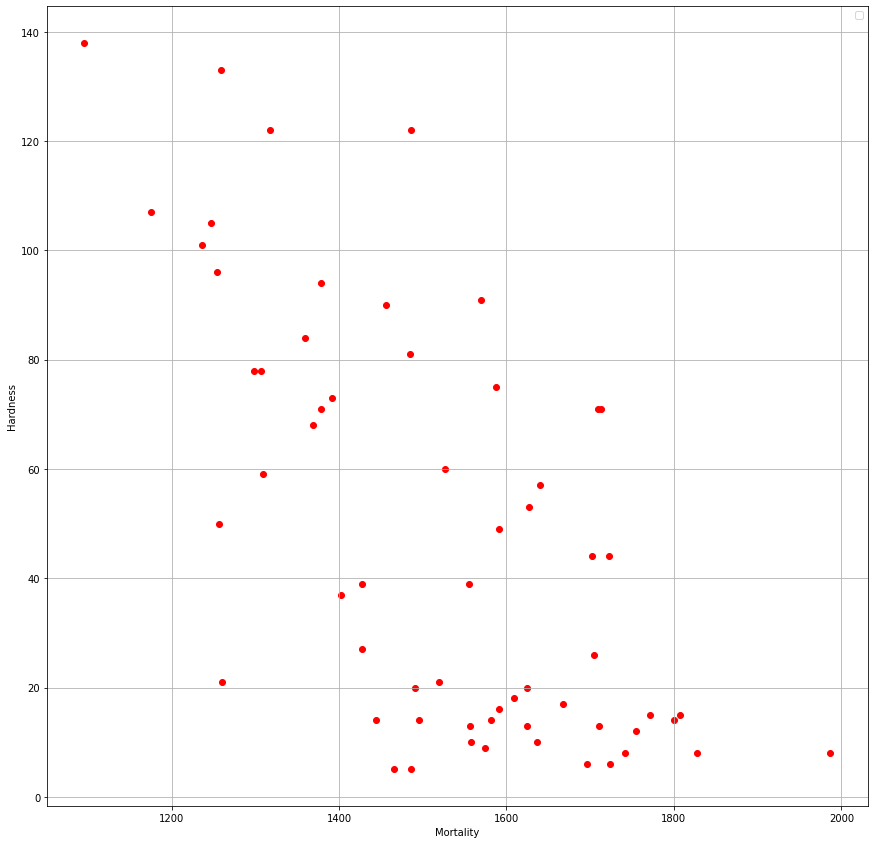

In [56]:
x_data = data_frame['mortality']
y_data = data_frame['hardness']
plt.figure(figsize=(50, 50))

ax = plt.subplot(3,3,1)
plt.scatter(x_data, y_data, color="red")
plt.xlabel("Mortality")
plt.ylabel("Hardness")
plt.grid(True)
plt.legend()

# __Task №1.__
На данных постройте 95% доверительный интервал для средней годовой смертности в больших городах. Чему равна его нижняя граница? Округлите ответ до 4-ч знаков после запятой.

In [57]:
from statsmodels.stats.weightstats import _tconfint_generic, _zconfint_generic

In [58]:
df_mortality_mean = data_frame["mortality"].mean()
df_mortality_mean

1524.1475409836066

Дисперсия нам неизвестна, поэтому для построения доверительного интервала будем использовать t-критерий Стьюдента
Вместо гипотетической теоретической дисперсии $\sigma^2$, которую мы на самом деле в данном случае не знаем, используем выборочные дисперсии, и построим доверительные интервалы вида $$\bar{X}_n \pm t_{1-\frac{\alpha}{2}} \frac{S}{\sqrt{n}}$$

In [59]:
df_mortality_std = data_frame["mortality"].std(ddof=1) / sqrt(len(data_frame["mortality"]))
df_mortality_std

24.028521714278174

In [60]:
answer = list(_tconfint_generic(df_mortality_mean, df_mortality_std, len(data_frame["mortality"]) - 1,
                                     0.05, 'two-sided'))
answer = list(map(lambda x: round(x,4), answer))
answer

[1476.0833, 1572.2117]

# __Task №2.__
На данных из предыдущего вопроса постройте 95% доверительный интервал для средней годовой смертности по всем южным городам. Чему равна его верхняя граница? Округлите ответ до 4 знаков после десятичной точки.

In [61]:
data_frame

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
...,...,...,...,...
56,South,Walsall,1527,60
57,South,West Bromwich,1627,53
58,South,West Ham,1486,122
59,South,Wolverhampton,1485,81


In [62]:
data_frame_south = data_frame[data_frame["location"] == "South"]

In [63]:
data_frame_south

,location,town,mortality,hardness
0,South,Bath,1247,105
2,South,Birmingham,1466,5
7,South,Bournemouth,1299,78
9,South,Brighton,1359,84
10,South,Bristol,1392,73
12,South,Cardiff,1519,21
13,South,Coventry,1307,78
14,South,Croydon,1254,96
18,South,East Ham,1318,122
19,South,Exeter,1260,21


In [64]:
data_frame_south.shape

(26, 4)

In [65]:
data_frame_south.describe()

,mortality,hardness
count,26.000000,26.000000
mean,1376.807692,69.769231
std,140.269175,40.360682
min,1096.000000,5.000000
25%,1259.250000,40.250000
50%,1364.000000,75.500000
75%,1485.750000,99.750000
max,1627.000000,138.000000


In [66]:
df_south_mortality_mean = data_frame_south["mortality"].mean()
df_south_mortality_mean

1376.8076923076924

In [67]:
df_south_mortality_std = data_frame_south["mortality"].std(ddof=1) / sqrt(len(data_frame_south["mortality"]))
df_south_mortality_std

27.509048538240833

In [68]:
answer_1 = list(_tconfint_generic(df_south_mortality_mean, df_south_mortality_std, len(data_frame_south["mortality"]) - 1,
                                     0.05, 'two-sided'))
answer_1 = list(map(lambda x: round(x,4), answer_1))
answer_1

[1320.1517, 1433.4636]

In [69]:
data_frame_north = data_frame[data_frame["location"] == "North"]

In [70]:
data_frame_north

,location,town,mortality,hardness
1,North,Birkenhead,1668,17
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
5,North,Bolton,1558,10
6,North,Bootle,1807,15
8,North,Bradford,1637,10
11,North,Burnley,1755,12
15,North,Darlington,1491,20
16,North,Derby,1555,39
17,North,Doncaster,1428,39


In [71]:
print(t_criteria(data_frame_south, "mortality"))
print(t_criteria(data_frame_north, "mortality"))

[1320.1517, 1433.4636]
[1586.5605, 1680.6395]


Так как интервалы не пересекаются, можно сделать вывод, что смертность в северном и южном районах существенно различается

In [72]:
print(t_criteria(data_frame_south, "hardness"))
print(t_criteria(data_frame_north, "hardness"))

[53.4672, 86.0713]
[21.4225, 39.3775]


Вспомним формулу доверительного интервала для среднего нормально распределённой случайной величины с дисперсией
При σ=1 какой нужен объём выборки, чтобы на уровне доверия 95% оценить среднее с точностью ±0.1?

In [73]:
size = 385
a = [0.03,0.04,0.05,0.06]
for i in a:
    interv = _zconfint_generic(1, sqrt(1/size), i, 'two-sided')
    print((interv[1] - interv[0]) / 2)

0.1105980466101788
0.10466873642215918
0.09988901400397365
0.09585411800681226
